Objective 01 - distinguish between independent and dependent variables and connect with the terms features and target


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'
concrete = pd.read_csv(url)
concrete.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Text(0.5, 1.0, 'Concrete Properties')

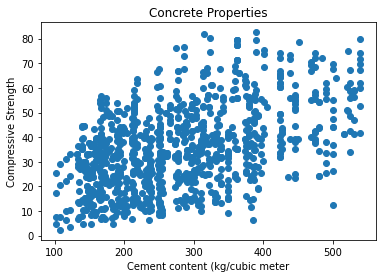

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x = concrete['cement'], y = concrete['strength'])
plt.xlabel('Cement content (kg/cubic meter')
plt.ylabel('Compressive Strength')
plt.title('Concrete Properties')

Objective 02 - distinguish between linear and nonlinear relationships on a scatterplot and calculate a linear correlation

In [3]:
mycols = ['cement', 'water', 'coarse_agg', 'strength']
concrete = pd.read_csv(url, usecols= mycols)

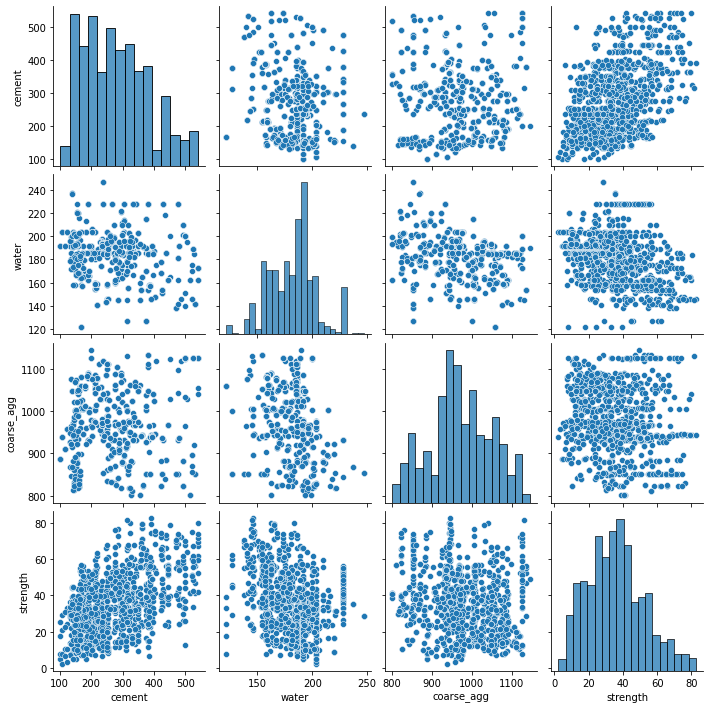

In [4]:
import seaborn as sns
sns.pairplot(concrete)
# plt.savefig('mod1_obj2_concrete_pair.png', transparent = False, dpi = 100)

In [5]:
from scipy.stats import pearsonr
# or scipy.stats import linregress or from statsmodels.formula.api import ols
#calculate the correlation coefficient
# retuns only the coefficient
strength_cement,_ = pearsonr(concrete['strength'], concrete['cement'])
strength_water,_ = pearsonr(concrete['strength'], concrete['water'])

print('The correlation between strength-cement: ', round(strength_cement, 3))
print('The correlation between strength-water: ', round(strength_water, 2))

The correlation between strength-cement:  0.498
The correlation between strength-water:  -0.29


Objective 03 - calculate and interpret the slope and intercept of a simple linear regression model and make a prediction



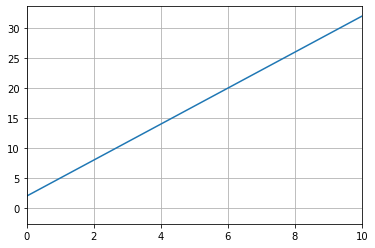

In [11]:
import numpy as np

#create our line
b_0 = 2 # intercept
b_1 = 3 # slope

x = np.linspace(-1, 10, 100)
y = b_0 + (b_1 * x)

# plot the line
plt.plot(x, y)
plt.xlim([0,10])
plt.grid()

In [12]:
url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

concrete = pd.read_csv(url)

concrete.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
# import the predictor class
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression()

# assign the data to the x and y variables (easier to see what we are fitting)

x = concrete['cement']
# add a new axis to create a column variable
# (scikit-learn expects the data to be in this shape)
X = x[:, np.newaxis]

y = concrete['strength']
model.fit (X,y)

/Users/rob/PycharmProjects/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


LinearRegression()

In [16]:
# slope (also called the model coefficient)
print ('The slope:', model.coef_)

# intercept
print ('The intercept', model.intercept_)

# in equation format
print ('Best-fit line: y= {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

The slope: [0.07958034]
The intercept 13.442528112399927
Best-fit line: y= 0.08x + 13.44


Text(0.5, 1.0, 'Concrete Properties')

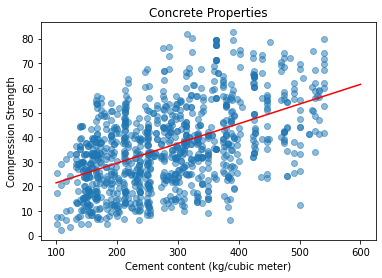

In [17]:
plt.scatter(x=x, y=y, alpha=0.5)

#plot the best-fit line
x_bestfit = np.linspace(100,600,10)
y_bestfit = 0.08*x_bestfit + 13.44
plt.plot(x_bestfit, y_bestfit, color ='red')

plt.xlabel('Cement content (kg/cubic meter)')
plt.ylabel('Compression Strength')
plt.title('Concrete Properties')

Objective 04 - calculate a residual
